In [257]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
import Exercise_1 as ex1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 1: Discrete Continous Choice
Consider the model

$$\begin{align*}
V_{t}(M_{t},\varepsilon_t^{0},\varepsilon_t^{1}) & = & \max_{L_{t}\in\{0,1\}}\left\{\mathcal{V}_t(M_t,L_t)+\sigma_{\varepsilon}\varepsilon_t^{L_t} \right\} \\ 
\mathcal{V}_{t}(M_{t},L_{t}) & = & \max_{C_{t}}\left\{ \frac{C_{t}^{1-\rho}}{1-\rho}-\lambda L_t+\beta\mathbb{E}_{t}\left[V_{t+1}(\bullet_{t+1})\right]\right\} \\
& \text{s.t.}\\
M_{t+1} & = & R(M_{t}-C_{t})+W\cdot L_{t}\\
\end{align*}$$

for $T=10$, $\beta=0.98$, $\rho=0.5$, $\lambda=1.3$, $R=1.0/\beta$, $W=1$, $\sigma_{\varepsilon}=0.5$, and $\xi_t^0$ and $\xi_t^1$ are *Extreme Value Type I* such that:

$$
\mathbb{E}[V_t(M_t,\varepsilon_t^0,\varepsilon_t^1 )\mid M_t] = \sigma_{\varepsilon} \log \Big(\sum_{j \in \{0,1\}} \exp\Big(\frac{\mathcal{V}{t}(M_{t},L_{t})}{\sigma_{\varepsilon}}\Big)     \Big) \equiv \text{logsum} \big(\mathcal{V}{t}(M_{t},\bullet)\big)
$$

### 1. Solve the model using your prefered method

In [258]:
# Setup
par = ex1.setup()
# Solve
sol = ex1.solve_DC(par)

#### 2. Plot the choice-specific value functions in period 1 and the optimal choice of $L_1$ for $ \varepsilon_t^0= \varepsilon_t^1 = 0$

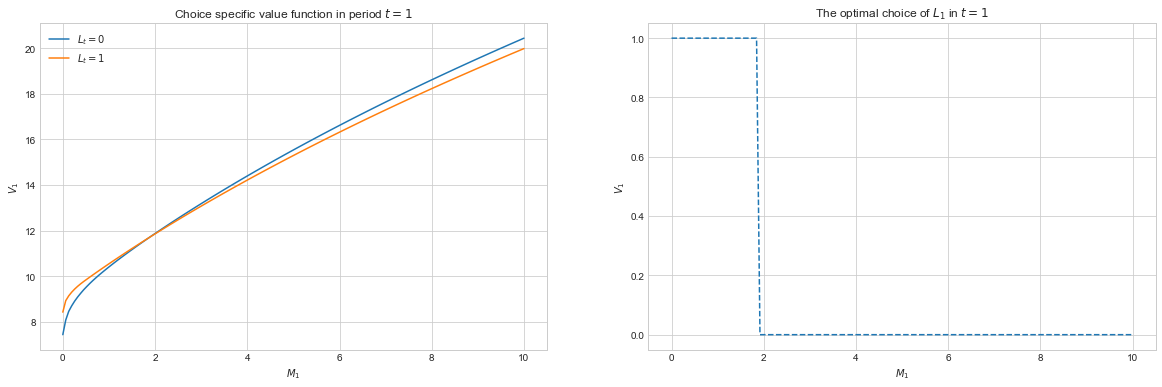

In [259]:
fig = plt.figure(figsize=(20,6)) 

# Choice specific value function
ax = fig.add_subplot(1,2,1)
ax.plot(par.grid_M,sol.V[0,:,0])
ax.plot(par.grid_M,sol.V[1,:,0])
ax.set_title(f'Choice specific value function in period $t=1$')
ax.set_xlabel("$M_1$")
ax.set_ylabel(f'$V_1$')
plt.legend((f'$L_t=0$',f'$L_t=1$'))


# Optimal labor choice
L = sol.V[1,:,0] > sol.V[0,:,0]

ax = fig.add_subplot(1,2,2)
ax.plot(par.grid_M,L, ls ='--')
ax.set_title(f'The optimal choice of $L_1$ in $t=1$')
ax.set_xlabel("$M_1$")
ax.set_ylabel(f'$V_1$')


plt.show()

#### 3. Simulate from the model using that
$$\begin{eqnarray*}
Pr(L_t=1 \mid M_t) & = & Pr[\mathcal{V}_t(M_t,1)-\mathcal{V}_t(M_t,0) \geq \sigma_{\varepsilon}(\varepsilon_t^0-\varepsilon_t^1)] \\
& = & \frac{\exp(\mathcal{V}_t(M_t,1)/\sigma_{\varepsilon})}{\sum_{j \in \{0,1\}} \exp(\mathcal{V}_t(M_t,j)/\sigma_{\varepsilon})}
\end{eqnarray*}$$

In [260]:
sim = ex1.simulate(par,sol)

#### 4. Plot the frequency of $L_t = 1$.

In [261]:
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)
t_grid = [t for t in range(1,par.T+1)]

ax.plot(t_grid,np.mean(sim.L,axis=0))
ax.set_title(f'Mean of L')
ax.set_xlabel("$t$")

plt.show()

#### 5. Redo exercise for increasing values of $\sigma_{\varepsilon}$. What happens to the frequency of $L_t = 1$?

In [265]:
sigma_vec = np.array([0.1,0.3,0.5,0.9,10])           # Define a vector of different sigma values
mean_L = np.nan + np.zeros((par.T, sigma_vec.size))  # Initialize a matrix to store the solution

for i,num in enumerate(sigma_vec):
         # fill in

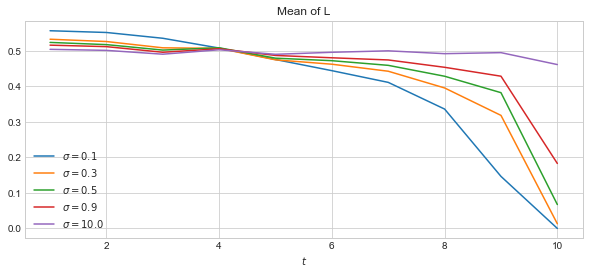

In [266]:
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)
t_grid = [t for t in range(1,par.T+1)]

ax.set_title(f'Mean of L')
ax.set_xlabel("$t$")
for i, num in enumerate(sigma_vec):
    ax.plot(t_grid,mean_L[:,i],label=f'$\sigma={num}$')
plt.legend(loc=3, ncol=1)

plt.show()